In [1]:
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Declare variables
#file = glob.glob('/media/shujakhalid/EncryptedDrive2/intraoperativeperformance/Autoencoder_Analysis/prdn/logs/epochs_1000_hidden_dim_1125_time_steps_9000_batch_size_10_num_layers_1_num_directions_2_dropout_11548695826/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_500_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552060503/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_5000_hidden_dim_562_time_steps_2250_batch_size_30_num_layers_1_num_directions_2_dropout_11551707925/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_5000_hidden_dim_562_time_steps_2250_batch_size_30_num_layers_1_num_directions_2_dropout_11551469417/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552425157/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_500_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552422960/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552496848/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_4_time_steps_2250_batch_size_5_num_layers_1_num_directions_2_dropout_0.31552496932/*_log.txt')
# ==================
# Used for analysis
# ------------------
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552507862/*_log.txt')
# ==================
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552507802/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_300_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.51552568767/*_log.txt')
# for NeurIPS
#file = glob.glob('/home/skhalid/Documents/intraoperativeperformance/Autoencoder_Analysis/LOG_FILES_FOR_PAPER/epochs_200_hidden_dim_600_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_activity_lstm_1557694256_louo.txt')
file = glob.glob('/home/skhalid/Documents/intraoperativeperformance/Autoencoder_Analysis/LOG_FILES_FOR_PAPER/epochs_200_hidden_dim_600_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_activity_lstm_1557753356_loso.txt')

In [3]:
file_obj = open(file[0], "r")
file_arr = file_obj.readlines()

In [4]:
print(len(file_arr))

20930


In [5]:
# Go through all of the lines in the file array and calculate the scores for each of the runs
# by first extracting the data from the log file.
regex_1 = 'xxxxxxxxxxxxxxx run'
regex_2 = '######################### ---'
regex_3 = "preds"
regex_4 = "labls"
regex_5 = "diffs"
regex_6 = "epoch: "
regex_6b = " m-batch"
regex_7 = "trn_loss"
regex_8 = "vld_loss"
regex_9 = "vld_acc"
regex_10 = "Accuracy (1)" # knot_tying
regex_11 = "Accuracy (2)" # needle_passing
regex_12 = "Accuracy (3)" # suture_handling

x_folds = 5
m_batches = 30 # Arbitrary no. that should be large enough to capture all reqd. data
counter = 0
data = {"run_"+str(v+1): {"batch_"+str(w+1): {regex_3: [], regex_4: [], regex_5: [], regex_6: [], regex_7: [], regex_8: [], regex_9: [], "knot_tying": [], "needle_passing": [], "suture_handling": []} for w in range(m_batches)} for v in range(x_folds)}
START_FLAG = False
#epochs = int(file[0].split('/')[-2].split('epochs_')[-1].split('_hidden')[0])
epochs = int(file[0].split('/')[-1].split('epochs_')[-1].split('_hidden')[0])

In [6]:
for indx, val in enumerate(file_arr):
    if (regex_1 in val):
        counter = counter+1
        START_FLAG = True
    elif (regex_2 in val):
        batch = 1        
    elif ("m-batch" in val):
        batch += 1
        
    if (START_FLAG):
        if (regex_3 in val):
            preds = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_3].append(preds)
        if (regex_4 in val):
            labls = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_4].append(labls)
        if (regex_5 in val):
            diffs = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_5].append(diffs)
        if (regex_10 in val):
            knot_tying = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["knot_tying"].append(knot_tying)
        if (regex_11 in val):
            needle_passing = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["needle_passing"].append(needle_passing)
        if (regex_12 in val):
            suture_handling = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["suture_handling"].append(suture_handling)
        if (regex_6 in val):
            epoch = eval(val.split(regex_6)[-1].split(regex_6b)[0])
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_6].append(epoch)
        if (regex_7 in val):
            trn_loss = val.split(regex_7)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_7].append(trn_loss)
        if (regex_8 in val):
            vld_loss = val.split(regex_8)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_8].append(vld_loss)
        if (regex_9 in val):
            vld_acc = val.split(regex_9)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_9].append(vld_acc)
        
#         print("run_"+str(counter))
#         print("batch_"+str(batch))
#         print(val)
#         print()
#         print(data['run_2'])
#         print()       


In [7]:
batch

3

In [8]:
regex_5

'diffs'

In [9]:
counter

5

In [10]:
#data["run_"+str(counter)]["batch_"+str(2)]["diffs"]

In [11]:
data["run_"+str(counter)]["batch_"+str(batch)][regex_5]

[]

In [12]:
data['run_1'].keys()

dict_keys(['batch_1', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_14', 'batch_15', 'batch_16', 'batch_17', 'batch_18', 'batch_19', 'batch_20', 'batch_21', 'batch_22', 'batch_23', 'batch_24', 'batch_25', 'batch_26', 'batch_27', 'batch_28', 'batch_29', 'batch_30'])

In [13]:
def rmse(diffs):
    return np.sqrt(((diffs) ** 2).mean())

In [14]:
# Plotting the training losses:
def metrics(run):
    trn_loss_arr = [np.array([float(v) for v in data[run][key]["trn_loss"]]) for key in data['run_1'].keys()]
    trn_loss_arr = np.array([x for x in trn_loss_arr if x!=[]])
    trn_loss_arr_mean = np.mean(trn_loss_arr, axis=0)

    vld_loss_arr = [np.array([float(v) for v in data[run][key]["vld_loss"]]) for key in data['run_1'].keys()]
    vld_loss_arr = np.array([x for x in vld_loss_arr if x!=[]])
    vld_loss_arr_mean = np.mean(vld_loss_arr, axis=0)

    vld_acc_arr = [np.array([float(v.split('%')[0]) for v in data[run][key]["vld_acc"]]) for key in data['run_1'].keys()]
    vld_acc_arr = np.array([x for x in vld_acc_arr if x!=[]])
    vld_acc_arr_mean = np.mean(vld_acc_arr, axis=0)
    
    # knot_tying
    knot_tying_arr = [np.array([float(v.split('%')[0]) for v in data[run][key]["knot_tying"]]) for key in data['run_1'].keys()]
    knot_tying_arr = np.array([x for x in knot_tying_arr if x!=[]])
    kt_mean = np.mean(knot_tying_arr, axis=0)
    
    # needle_passing
    needle_passing_arr = [np.array([float(v.split('%')[0]) for v in data[run][key]["needle_passing"]]) for key in data['run_1'].keys()]
    needle_passing_arr = np.array([x for x in needle_passing_arr if x!=[]])
    np_mean = np.mean(needle_passing_arr, axis=0)
    
    # suture_handling
    suture_handling_arr = [np.array([float(v.split('%')[0]) for v in data[run][key]["suture_handling"]]) for key in data['run_1'].keys()]
    suture_handling_arr = np.array([x for x in suture_handling_arr if x!=[]])
    sh_mean = np.mean(suture_handling_arr, axis=0)
    
    vld_rmse = [np.array(data[run][key]["diffs"]) for key in data['run_1'].keys()]
    vld_rmse = np.array([x for x in vld_rmse if x!=[]])
    vld_rmse_mean = np.mean(vld_rmse, axis=0)
    
    return trn_loss_arr_mean, vld_loss_arr_mean, vld_acc_arr_mean, vld_rmse_mean, kt_mean, np_mean, sh_mean

In [15]:
# test_run = 'run_1'
# trn_loss_arr_mean, vld_loss_arr_mean, vld_acc_arr_mean = metrics(test_run)
# plt.figure()
# plt.title('Training losses')
# plt.plot(trn_loss_arr_mean)

# plt.figure()
# plt.title('Validation losses')
# plt.plot(vld_loss_arr_mean)

# plt.figure()
# plt.title('Validation accuracies')
# plt.plot(vld_acc_arr_mean)


vld_acc: 100.0
knot-tying accuracies: 100.0
needle-passing accuracies: 77.5
suture-handling accuracies: 100.0
val_rmse: 0.05

vld_acc: 100.0
knot-tying accuracies: 100.0
needle-passing accuracies: 100.0
suture-handling accuracies: 100.0
val_rmse: 0.0

vld_acc: 100.0
knot-tying accuracies: 100.0
needle-passing accuracies: 100.0
suture-handling accuracies: 100.0
val_rmse: 0.0

vld_acc: 100.0
knot-tying accuracies: 96.9165
needle-passing accuracies: 75.0
suture-handling accuracies: 100.0
val_rmse: 0.095

vld_acc: 100.0
knot-tying accuracies: 100.0
needle-passing accuracies: 100.0
suture-handling accuracies: 100.0
val_rmse: 0.0

final validation rmse: 0.029000000000000005
final ktying_arr accuracy: 99.38329999999999
final npass_arr accuracy: 90.5
final shand_arr accuracy: 100.0



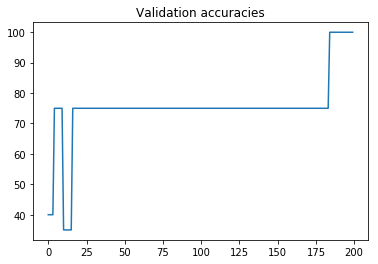

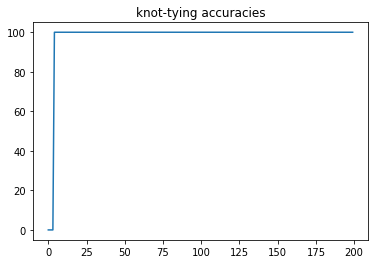

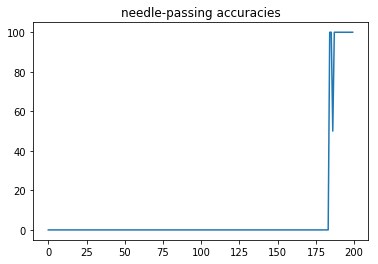

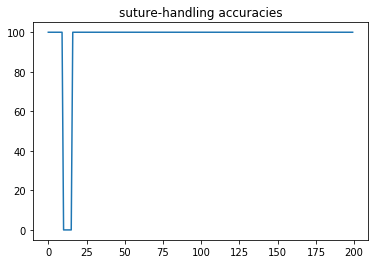

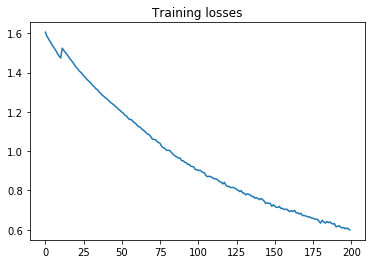

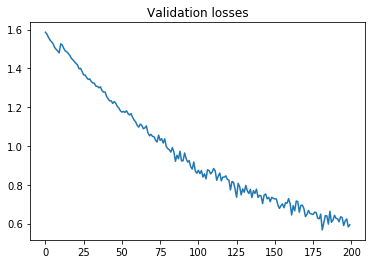

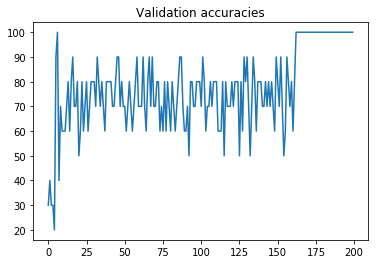

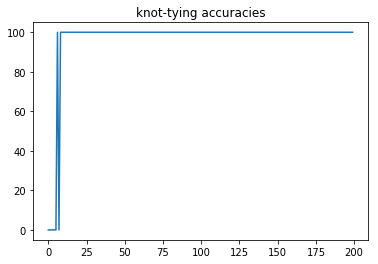

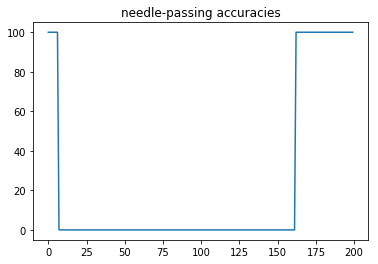

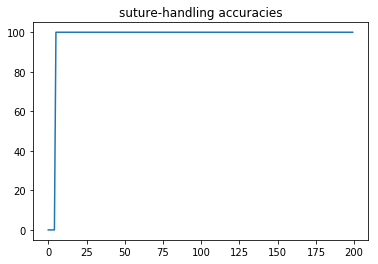

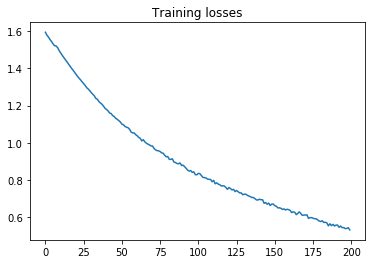

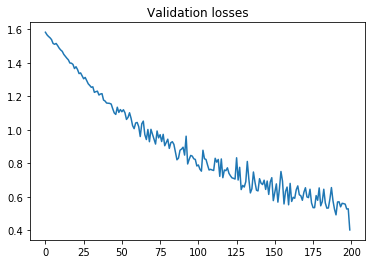

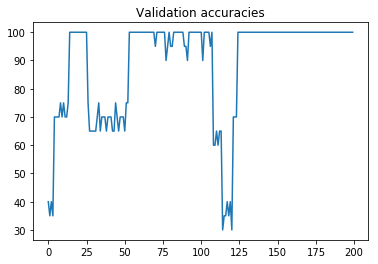

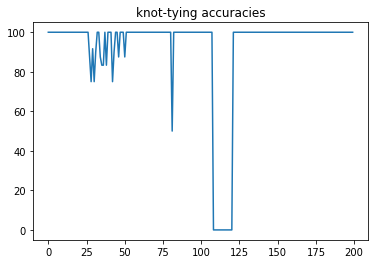

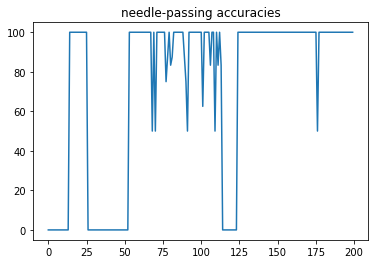

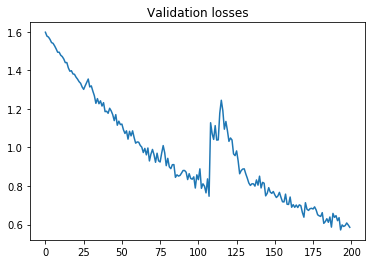

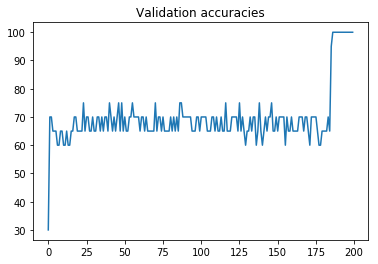

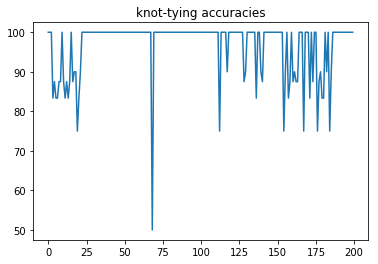

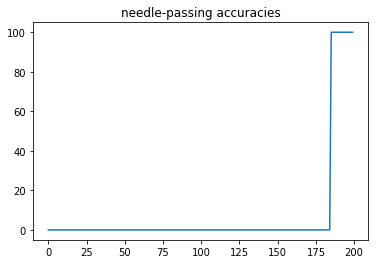

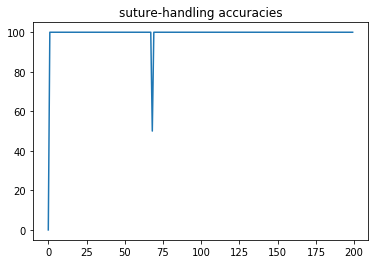

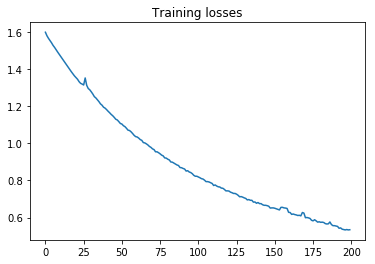

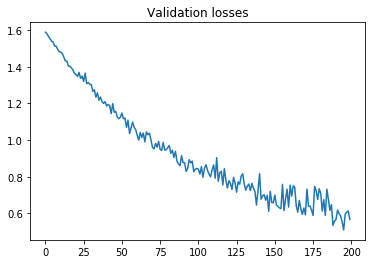

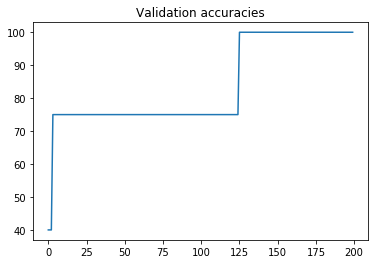

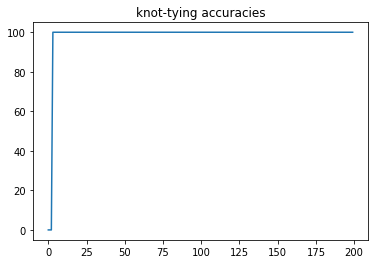

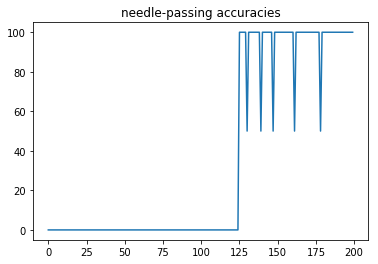

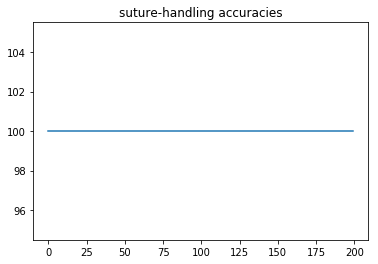

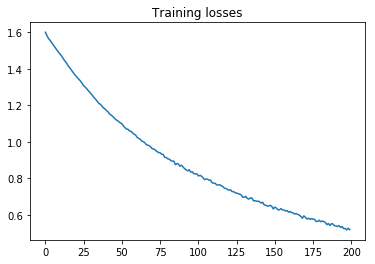

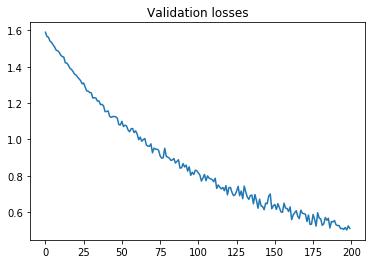

In [25]:
# Validation accuracies (for each batch):
trn_loss_arr_batch = []
vld_loss_arr_batch = []
vld_acc_arr_batch = []
val_rmse = []
ktying_arr = []
npass_arr = []
shand_arr = []
lim_a = 180
lim_b = 200

for i in range(x_folds):
    # Snip contains the entire set of 100 elements 
    # for each of the 100 epochs
    
    test_run = 'run_'+str(i+1)
    trn_loss_arr_mean, vld_loss_arr_mean, vld_acc_arr_mean, vld_rmse_mean, ktying, npass, shand = metrics(test_run)
    
#     trn_loss_arr_batch.append(trn_loss_arr_mean)
#     vld_loss_arr_batch.append(vld_loss_arr_mean)
#     vld_acc_arr_batch.append(vld_acc_arr_mean)
#     kt_arr_batch.append(kt)
#     np_arr_batch.append(np)
#     sh_arr_batch.append(sh)
    
    plt.figure()
    plt.title('Validation accuracies')
    plt.plot(vld_acc_arr_mean)
    plt.figure()
    plt.title('knot-tying accuracies')
    plt.plot(ktying)
    plt.figure()
    plt.title('needle-passing accuracies')
    plt.plot(npass)
    plt.figure()
    plt.title('suture-handling accuracies')
    plt.plot(shand)
    plt.figure()
    plt.title('Training losses')
    plt.plot(trn_loss_arr_mean)
    plt.figure()
    plt.title('Validation losses')
    plt.plot(vld_loss_arr_mean)
    
    print()
    print('vld_acc: {}'.format(np.max(vld_acc_arr_mean[lim_a:lim_b])))
    print('knot-tying accuracies: {}'.format(np.mean(ktying[lim_a:lim_b])))
    print('needle-passing accuracies: {}'.format(np.mean(npass[lim_a:lim_b])))
    print('suture-handling accuracies: {}'.format(np.mean(shand[lim_a:lim_b])))
    print('val_rmse: {}'.format(np.mean(vld_rmse_mean[lim_a:lim_b])))
    
    val_rmse.append(np.mean(vld_rmse_mean[lim_a:lim_b]))
    ktying_arr.append(np.mean(ktying[lim_a:lim_b]))
    npass_arr.append(np.mean(npass[lim_a:lim_b]))
    shand_arr.append(np.mean(shand[lim_a:lim_b]))
    
# trn_loss_arr_batch = np.array(trn_loss_arr_batch)
# vld_loss_arr_batch = np.array(vld_loss_arr_batch)
# vld_acc_arr_batch = np.array(vld_acc_arr_batch)
print()
print('final validation rmse: {}'.format(np.mean(val_rmse)))
print('final ktying_arr accuracy: {}'.format(np.mean(ktying_arr)))
print('final npass_arr accuracy: {}'.format(np.mean(npass_arr)))
print('final shand_arr accuracy: {}'.format(np.mean(shand_arr)))
print()

# # Find the batch mean
# trn_loss_arr_batch_mean = np.mean(trn_loss_arr_batch, axis=0)
# vld_loss_arr_batch_mean = np.mean(vld_loss_arr_batch, axis=0)
# vld_acc_arr_batch_mean = np.mean(vld_acc_arr_batch, axis=0)
    
# plt.figure()
# plt.title('Training losses')
# plt.plot(trn_loss_arr_batch_mean)

# plt.figure()
# plt.title('Validation losses')
# plt.plot(vld_loss_arr_batch_mean)

# plt.figure()
# plt.title('Validation accuracies')
# plt.plot(vld_acc_arr_batch_mean)

In [26]:
# print(np.mean(vld_acc_arr_batch[0][96-5:96+5]))
# print(np.mean(vld_acc_arr_batch[1][70-5:70+5]))
# print(np.mean(vld_acc_arr_batch[2][58-5:58+5]))
# print(np.mean(vld_acc_arr_batch[3][62-5:62+5]))
# print(np.mean(vld_acc_arr_batch[4][62-5:62+5]))
# print(np.mean(vld_acc_arr_batch[5][61-5:61+5]))
# print(np.mean(vld_acc_arr_batch[6][60-5:60+5]))
# print(np.mean(vld_acc_arr_batch[7][60-5:60+5]))
# print(np.mean(vld_acc_arr_batch[8][59-5:59+5]))
# print(np.mean(vld_acc_arr_batch[9][61-5:61+5]))

In [18]:
# print(vld_rmse)

In [19]:
#test
preds = [[3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0]]
labls = [[3.0, 2.0, 2.0, 3.0, 3.0, 3.0], [3.0, 2.0, 2.0, 4.0, 3.0, 4.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 2.0, 1.0, 2.0, 2.0, 3.0], [5.0, 5.0, 4.0, 5.0, 5.0, 5.0], [1.0, 2.0, 1.0, 2.0, 2.0, 2.0], [1.0, 2.0, 1.0, 3.0, 2.0, 3.0], [4.0, 4.0, 3.0, 4.0, 4.0, 4.0], [1.0, 2.0, 2.0, 2.0, 2.0, 3.0], [4.0, 3.0, 3.0, 3.0, 3.0, 4.0]]

In [20]:
# import numpy as np
# diff = np.array([p[0] for p in preds])-np.array([l[0] for l in labls])
# num = len(np.where(num==0)[0])
# den = len([p[0] for p in preds])
# return num/den
# print('Percentage of correct predictions for respect_for_tissue: {}'.format(num/den))

In [21]:
#[v for v in vld_acc_arr_mean]

In [22]:
test = np.array([int(v) for v in vld_acc_arr_mean])

In [23]:
print(test)

[ 40  40  40  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75  75 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100]


In [24]:
print(np.max(test))

100
